## Solutions Q33 - 38

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### Q33 answer
It turns out that the determinant is the product of the diagonal terms only because of the position of the zeros. Consequently, only two multiplications are needed. Python/Sympy gives:

In [2]:
alpha,beta,gamma,a,b,c=symbols('alpha,beta,gamma,a,b,c')

n2=(cos(alpha)-cos(gamma)*cos(beta))/sin(gamma)
M = Matrix([[a,0,0],[b*cos(gamma),b*sin(gamma),0],[c*cos(beta),c*n2,c*sqrt(sin(beta)**2-n2**2)]])
M

⎡   a                  0                                      0               
⎢                                                                             
⎢b⋅cos(γ)           b⋅sin(γ)                                  0               
⎢                                                                             
⎢                                              _______________________________
⎢                                             ╱                           2   
⎢          c⋅(cos(α) - cos(β)⋅cos(γ))        ╱    (cos(α) - cos(β)⋅cos(γ))    
⎢c⋅cos(β)  ──────────────────────────  c⋅   ╱   - ───────────────────────── + 
⎢                    sin(γ)                ╱                  2               
⎣                                        ╲╱                sin (γ)            

        ⎤
        ⎥
        ⎥
        ⎥
________⎥
        ⎥
   2    ⎥
sin (β) ⎥
        ⎥
        ⎦

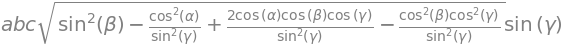

In [3]:
M.det() 

This last equation can be simplified further by cancelling the sine terms to give the simpler form

$$\displaystyle V = abc\sqrt{1 - \cos^2(\beta)(1+ \cos^2(\gamma)) - \cos^2(\alpha) + 2\cos(\alpha) \cos(\beta) \cos(\gamma) }$$

### Q34 answer
$n_2$ is zero when $\cos(\alpha) - \cos(\gamma)\cos(\beta) = 0$ which occurs when $\alpha = \beta = \pi/2$ or $\alpha=\gamma =\pi/2$, which occurs in a monoclinic crystal, or when all three angles are $90^\text{o}$ as in cubic, tetragonal, or orthorhombic crystals.


### Q35 answer
Equation 21 is simplified when $\alpha=\gamma=\pi/2$ because the cosines of these angles are zero; therefore, 

$$\displaystyle v^2 = v_1^2a^2 + v_2^2b^2 + v_3^2c^2 + 2v_1v_3ac \cos(\beta)$$

where $v_1, v_2, v_3$ are the normalized components of the bond vector along the $\vec a, \vec b, \vec c$ vectors respectively, and these define the unit cell axes whose lengths are $a, b, c$. The bond length is the positive square root of $v^2$.

Converting to $xyz$ axes gives,

$$\displaystyle \begin{bmatrix}v_1&v_2&v_3\end{bmatrix}\begin{bmatrix}a&0&0\\ 0&b&0\\c\cos(\beta)& 0 & c\sin(\beta)\end{bmatrix}$$

which by matrix multiplication is

$$\displaystyle \vec d=\begin{bmatrix}v_1a+v_3c\cos(\beta)& v_2b& v_3c\sin(\beta)\end{bmatrix}$$

The dot product is the square of the bond length and is $\vec d\cdot\vec d $. Using Sympy to do the algebra 

In [4]:
alpha,beta,gamma,a,b,c,v1,v2,v3 = symbols('alpha,beta,gamma,a,b,c,v1,v2,v3')
v  = Matrix([[v1,v2,v3]])
M  = Matrix( [ [a,0,0],[0,b,0],[ c*cos(beta),0,c*sin(beta)] ] )

In [5]:
d = v*M  # matrix multiply in Sympy is *
d

[a⋅v₁ + c⋅v₃⋅cos(β)  b⋅v₂  c⋅v₃⋅sin(β)]

In [6]:
lensqrd = d*d.T  # .T is transpose to get row column multiplication

In [7]:
simplify(expand(lensqrd))

⎡ 2   2                         2   2    2   2⎤
⎣a ⋅v₁  + 2⋅a⋅c⋅v₁⋅v₃⋅cos(β) + b ⋅v₂  + c ⋅v₃ ⎦

which is the same as equation 21 when $\alpha=\gamma=\pi/2$.

### Q36 answer
(a) A simple basis set for the cubic ($a=b=c$) crystal (or orthorhombic $a\ne b\ne c$ or tetragonal ($a=b\ne c$) ) is 

$$\begin{bmatrix}a&0&0\end{bmatrix}, \begin{bmatrix} 0 & b & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 &c\end{bmatrix}$$

such that any point is a multiple of $a, b, c$. If the line $1-4$ is $\vec v_1$, and $2-4,\; \vec v_2$, then the angle $\theta$ is calculated using $\vec v_1\cdot\vec v_2 = |\vec v_1 ||\vec v_2 |\cos(\theta)$. With the vectors represented as matrices;

$$\displaystyle \vec v_1\cdot\vec v_2=\begin{bmatrix}-a/3 &-b & c\end{bmatrix}\begin{bmatrix}a-a/3\\-b\\-c\end{bmatrix}=-\frac{2}{9}a^2 + b^2  + c^2 $$

The length of each vector is $|\vec v_1\cdot\vec v_1|=\sqrt{a^2/9+b^2+c^2},\;|\vec v_22\cdot\vec v_2|=\sqrt{4a^2/9+b^2+c^2}$. The angle between them is found from the cosine

$$\displaystyle \cos(\theta)= \frac{-2a^2/9 + b^2  + c^2}{\sqrt{a^2/9+b^2+c^2}\sqrt{4a^2/9+b^2+c^2}}$$

If the crystal is cubic $a=b=c$ and so $\displaystyle \cos(\theta)= \frac{-2/9 + 2}{\sqrt{1/9+2}\sqrt{4/9+2}}$ hence $\theta=38.5^\text{o}$. This result can be generalized to find any similar angle.

(b) The distance $1 \to 2$ in the hexagonal crystal shown, can be found using the cosine rule and is $3\sqrt{3a}$ if the length of each side is $a$. Calculate the same distance using vectors, and then the distance $1-3$ and angle $2-1-3$.

We let $\vec u$ and $\vec v$ be two unit vectors along the two sides of the hexagon as shown in the figure. The transformation into $x-y$ coordinates of a point $\alpha\vec u, \beta\vec v$ can be found using matrix equation 31 with $\theta = 60^\text{o}, \;a = b$ and $c = 0$ and thereby reducing it to a $2 \times 2$ matrix,

$$\displaystyle \begin{bmatrix} x&y\end{bmatrix} =\begin{bmatrix} \alpha&\beta\end{bmatrix}\begin{bmatrix}a& 0\\a\cos(\alpha) & a\sin(\alpha) \end{bmatrix}$$

The point 2 is at $(3a, 3a)$ in the $u-v$ basis set, so that its $x$ and $y$ coordinates are $x = a/2$ and $y = (3a/2)\sqrt{3}$. Next, with point 1 as the origin, the $1-2$ vector equals $\begin{bmatrix}9a/2 &3a\sqrt{3}/2\end{bmatrix}$ and its length is the square root of its dot product. The dot product is  $\displaystyle \begin{bmatrix}9a/2 &3 a\sqrt{3}/2\end{bmatrix}\begin{bmatrix} 9a/2 \\ 3a\sqrt{3}/2 \end{bmatrix}= 27a^2$ making the length $3a\sqrt(3)$. This can be see from figure 24 to be three times the length of the small triangle in the bottom-right of each hexagon between 1 and 2.

By a similar calculation, the length 1-3 is $2a\sqrt{7}$. The angle 2-1-3 ($\phi$) is found using the dot product of the two vectors 1-3 and 1-2 which is $\displaystyle 3a^2\begin{bmatrix}3/2& \sqrt{3}/2\end{bmatrix}\begin{bmatrix}4\\ 2\sqrt{3}\end{bmatrix}=27a^2$. Using $\cos(\phi)=27/(\sqrt{28}\sqrt{27})$ the angle is $10.9^\text{o}$. This can also be checked using geometry, because the angle 1-2-3 is a right angle and the length 1-3 is known. Point 4 has coordinates $(1, 4)$ and is at a distance $a\sqrt{21}$ from the origin. The angle 2-1-4 is $19.1^\text{o}$. The calculation with point 5 produces the same results as for point 4 because points 4 and 5 are symmetrical about point 2.

### Q37 answer
The Python code to calculate the C–N1 bond length (in angstrom) is somewhat simpler than described in the text. The components of the positional vectors are multiplied by $a, b$, and $c$ to put them into angstrom. A function is defined to calculate the bond length; equation 24. The absolute value of the square root is taken to ensure that it is always positive.  Notice that the dot product is calculated using equation 20 because the axes are not all at right angles.

In [13]:
# Tetrazene bond lengths and angles.
a = 5.23
b = 5.79  
c = 6.63 
N1 = np.array([  0.1834*a, -0.1669*b, -0.0015*c ]) 
C  = np.array([  0.2546*a,  0.0153*b,  0.1380*c ]) 
N2 = np.array([  0.0849*a,  0.1795*b,  0.1486*c ])
N3 = np.array([ -0.0849*a, -0.1795*b, -0.1486*c ]) 
               
alpha = np.pi/2 
beta = 115.5*np.pi/180 
gama = np.pi/2

bond_length = lambda delta : np.abs(np.sqrt( delta[0]**2+ delta[1]**2+ delta[2]**2\
                                         + 2*delta[0]*delta[2]*np.cos(beta ) ) )  # lambda function 

print('{:s}{:8.4f}'.format('length N1-C /nm = ',bond_length(N1-C)/10 ) )
print('{:s}{:8.4f}'.format('length N2-C /nm = ',bond_length(N2-C)/10 ) )
print('{:s}{:8.4f}'.format('length N1-N3 /nm = ',bond_length(N1-N3)/10 ) )

dot_prod = lambda u,v,beta: u[0]*v[0]+u[1]*v[1]+u[2]*v[2]+(u[0]*v[2]+u[2]*v[0])*np.cos(beta) # function

angle = lambda u,v,beta: np.arccos(dot_prod(u,v,beta)/(bond_length(u)*bond_length(v))) # function 

print('{:s}{:8.4f}'.format('angle N1-C-N2  = ',angle(C-N1,C-N2,beta)*180/np.pi ) )
print('{:s}{:8.4f}'.format('angle N3-N1-C  = ',angle(N1-N3,N1-C,beta)*180/np.pi ) )

length N1-C /nm =   0.1346
length N2-C /nm =   0.1323
length N1-N3 /nm =   0.1322
angle N1-C-N2  = 127.3354
angle N3-N1-C  = 116.2433


The carbon between the two adjacent nitrogen atoms has a bond angle of $127.34^\text{o}$ and the N3-N1-C angle $116.24^\text{o}$; both substantially different to the nominal sp$^2$ hybrid angle of $120^\text{o}$.

### Q38 answer
The equations to use are 32 and 33. Using the data, and Python from the previous question to define the atom and crystal coordinates, the calculation proceeds as follows. Note that an atom's coordinates now lack multiplication by $a, b$ and $c$ because these are included in the matrix $M$. Angstrom units are used.

In [9]:
# Bond lengths and angles using a matrix method.
a = 5.23
b = 5.79  
c = 6.63 
N1 = np.array([ 0.1834, -0.1669, -0.0015 ]) 
C  = np.array([ 0.2546,  0.0153,  0.1380 ]) 
N2 = np.array([ 0.0849,  0.1795,  0.1486 ])
N3 = np.array([-0.0849, -0.1795, -0.1486 ]) 
               
alpha = np.pi/2 
beta  = 115.5*np.pi/180 
gama  = np.pi/2 

n2 = ( np.cos(alpha)- np.cos(gama)*np.cos(beta) )/ np.sin(gama)

M = np.array([[a,0,0],[b*np.cos(gama),b*np.sin(gama),0],
              [c*np.cos(beta),c*n2,c*np.sqrt(np.sin(beta)**2-n2**2)]])

In [10]:
dcm1 = (C - N1).T @ M  #  @ performs matrix multiplication, the .T is the transpose.
bondCN1 = np.sqrt(np.dot(dcm1,dcm1))
bondCN1

In [11]:
dcm2 = (C-N2).T @ M
bondCN2 = np.sqrt(np.dot(dcm2,dcm2))
bondCN2

In [12]:
np.arccos( np.dot(dcm1,dcm2)/(bondCN1*bondCN2))*180/np.pi